## Hello Friends with this notebook I plan to provide a different way to explore our very own Titanic data set. I plan to use seaborn (sorry matplotlib lovers ;) )

### DataSet avaialable @ [Link to download directly from kaggle ](https://www.kaggle.com/c/titanic/data)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

Let us the understand who were travelling on the titanic on that unfortunate trip, can we anwer following questions ?

1. How many male, female and children ?
1. What was the distribution of male/female/children across reservation class.<br>2.1) Were there more children in First class as compared to third class <br>2.2) What was the distribution of survivors among male/female/children
1. What is the relationship between survival and with and without Cabin(assuming null cabin mean No cabin)

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### To answer Q1 we need to know # of children which is not available directly and needs to be derived based on the "Age" column. 

In [4]:
df["population_type"] = ['child' if x < 16 else df.iloc[idx]['Sex'] for idx, x in enumerate(df['Age'])]

In [5]:
df[df.Age < 16]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,population_type
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S,child
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,child
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S,child
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C,child
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S,child


In [6]:
df[df.Age > 16]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,population_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,female
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


In [7]:
### Visualizing population distribution using sns.countplot

<AxesSubplot:xlabel='population_type', ylabel='count'>

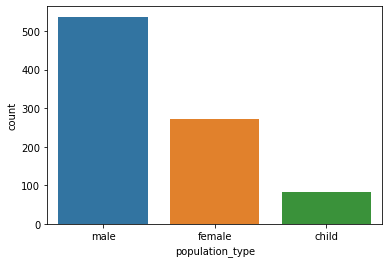

In [8]:
sns.countplot(x= "population_type", data = df)

### Visualizing population distribution using sns.FacetGrid

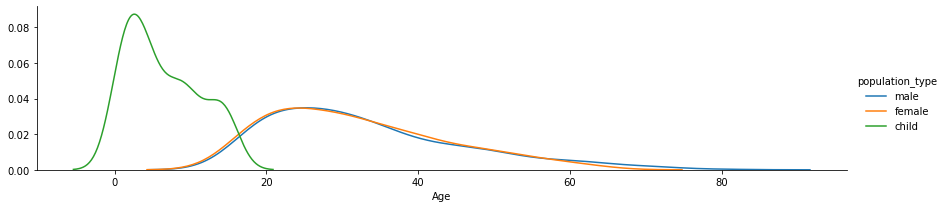

In [9]:
fg = sns.FacetGrid(data = df, hue = "population_type" , aspect=4)
fg.map(sns.kdeplot, "Age" )
fg.add_legend()

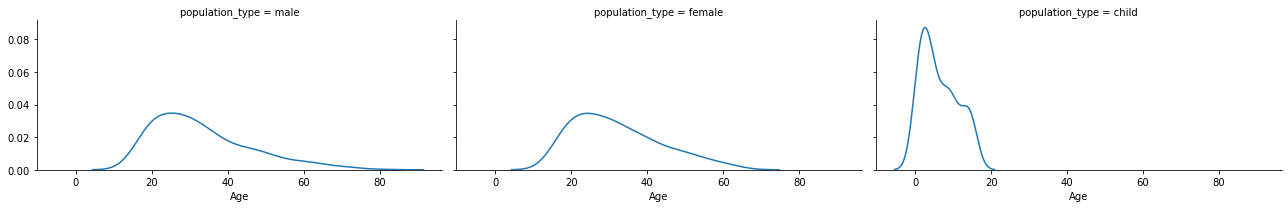

In [10]:
fg = sns.FacetGrid(data = df , col="population_type", aspect=2)
fg.map(sns.kdeplot, "Age" )

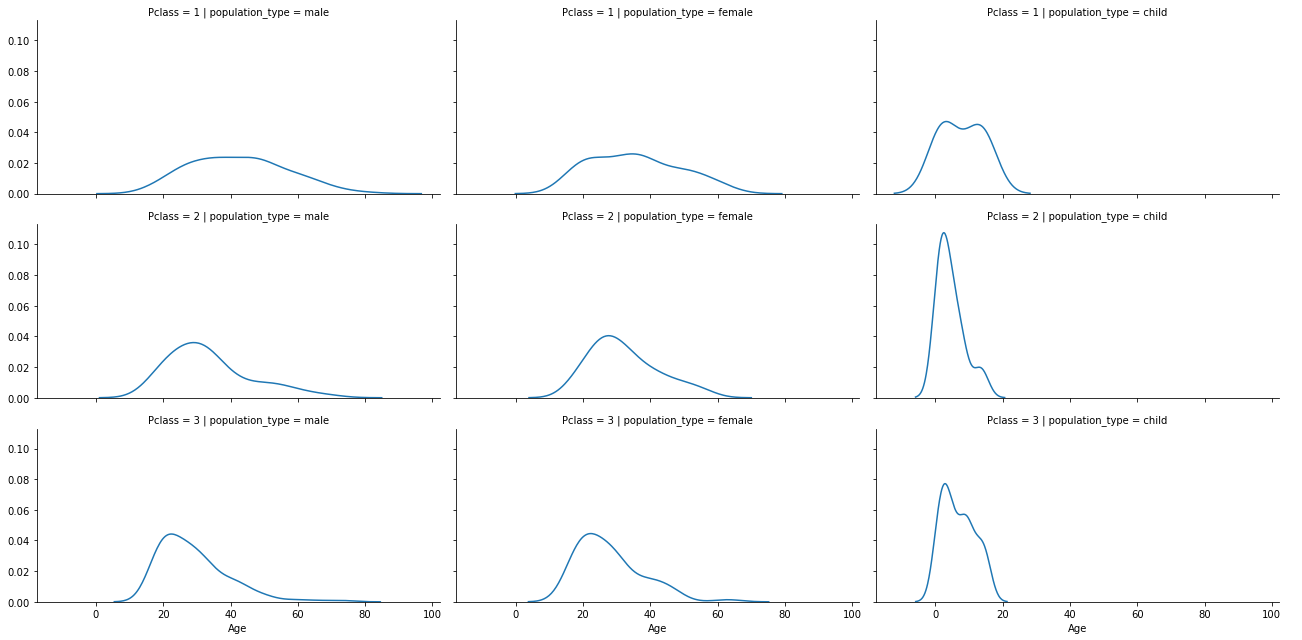

In [11]:
fg = sns.FacetGrid(data = df , row = "Pclass", col="population_type", aspect=2)
fg.map(sns.kdeplot, "Age")
fg.add_legend()

### Answering question 2.1<br> 
Were there more children in First class as compared to third class ?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

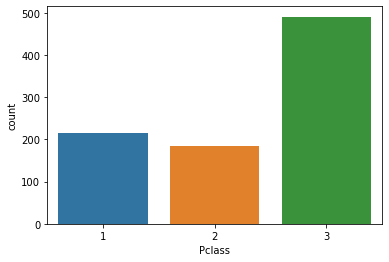

In [13]:
sns.countplot(x = 'Pclass', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

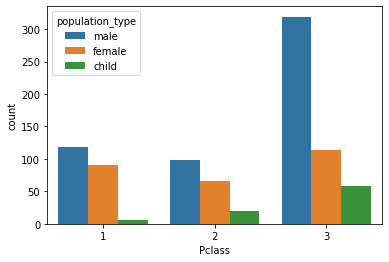

In [14]:
sns.countplot(x = 'Pclass', hue='population_type', data = df)

### Strangely there were many children in third class as compared to first and second class

### Lets answer the next question:
2.2) What was the distribution of survivors among male/female/children

<AxesSubplot:xlabel='population_type', ylabel='count'>

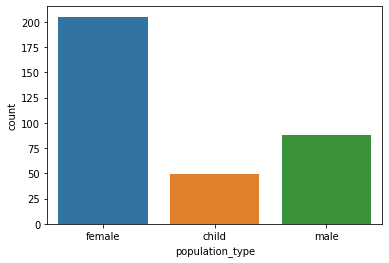

In [19]:
sns.countplot(x = df[df.Survived == 1]["population_type"], data = df)

<AxesSubplot:xlabel='population_type', ylabel='count'>

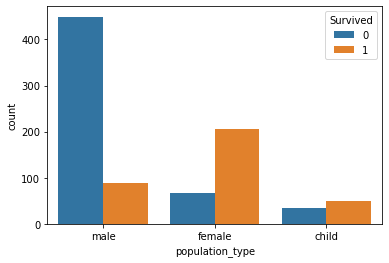

In [20]:
sns.countplot(x = df["population_type"], hue = "Survived", data = df)

### The first plot indicates female followed by male and children respectively were to top survivors while the second plot indicates feamales had the highest survival ration followed by children followed by male

### Lets answer the third question 
What is the relationship between survival and with and without Cabin(assuming null cabin mean No cabin)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  population_type  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [22]:
### Number of null enteries in Cabin column
df['Cabin'].isnull().sum()

687

### Lets continue form here 